In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# First, obtain the data

In [2]:
import pathlib
import os

p = pathlib.Path('.')

os.makedirs(p/'large_files', exist_ok=True)

Using the content of the file `"batch_download_zips.py"` in the `"images/"` folder. Updated for python3 usage.

In [3]:
import urllib


# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]


for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    # urllib.request.urlretrieve(link, p/'large_files'/fn)  # download the zip file
print("Download complete. Please check the checksums")

downloading images_01.tar.gz ...
downloading images_02.tar.gz ...
downloading images_03.tar.gz ...
downloading images_04.tar.gz ...
downloading images_05.tar.gz ...
downloading images_06.tar.gz ...
downloading images_07.tar.gz ...
downloading images_08.tar.gz ...
downloading images_09.tar.gz ...
downloading images_10.tar.gz ...
downloading images_11.tar.gz ...
downloading images_12.tar.gz ...
Download complete. Please check the checksums


In [3]:
image_dir = p/'large_files'/'images'

Go in you large_file folder with a terminal and extract tar.gz using 
`tar -xvzf images_XX.tar.gz` it should extract all images in `./large_files/images/`

On https://nihcc.app.box.com/v/ChestXray-NIHCC/folder/36938765345

Download the following files and upload them in `large_data` folder:
- BBox_List_2017.csv
- Data_Entry_2017.csv
- test_list.txt
- train_val_list.txt

# Data Analysis

In [4]:
ls = lambda x: list(x.iterdir())
count = lambda x : len(ls(x))

count(image_dir)

107122

In [5]:
read_txt = lambda fn : [line.rstrip() for line in open(p/"large_files"/fn)]

training = read_txt('train_val_list.txt')
testing  = read_txt('test_list.txt')

print('   - training - ')
print(len(training))
print(training[:10])
print('   - test     - ')
print(len(testing))
print(testing[:10])

   - training - 
86524
['00000001_000.png', '00000001_001.png', '00000001_002.png', '00000002_000.png', '00000004_000.png', '00000005_000.png', '00000005_001.png', '00000005_002.png', '00000005_003.png', '00000005_004.png']
   - test     - 
25596
['00000003_000.png', '00000003_001.png', '00000003_002.png', '00000003_003.png', '00000003_004.png', '00000003_005.png', '00000003_006.png', '00000003_007.png', '00000013_000.png', '00000013_001.png']


In [6]:
import pandas as pd

# de stands for "'Data_Entry_..."
de = pd.read_csv(p/'large_files'/'Data_Entry_2017.csv');


In [7]:
de.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [8]:
de.shape

(112120, 12)

In [9]:
de.shape[0] == count(image_dir)

False

Ok, missing data?

In [10]:
get_filename = lambda i : str(i).split('/')[-1]

In [11]:
get_filenames_in_dir = lambda x : [get_filename(i) for i in ls(x)]
dataset = get_filenames_in_dir(image_dir)

de = de[de['Image Index'].isin(dataset)]

In [12]:
de.shape

(107121, 12)

In [13]:
de.shape[0] == count(image_dir)

False

In [14]:
de.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object

In [15]:
de.isnull().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    107121
dtype: int64

In [16]:
bl = pd.read_csv(p/'large_files'/'BBox_List_2017.csv');

In [17]:
bl.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [18]:
bl.shape

(984, 9)

In [19]:
training[:10]

['00000001_000.png',
 '00000001_001.png',
 '00000001_002.png',
 '00000002_000.png',
 '00000004_000.png',
 '00000005_000.png',
 '00000005_001.png',
 '00000005_002.png',
 '00000005_003.png',
 '00000005_004.png']

In [20]:
tr_bl = bl[bl['Image Index'].isin(training)]
te_bl = bl[bl['Image Index'].isin(testing) ]

print(tr_bl.shape)
print(te_bl.shape)

(0, 9)
(984, 9)


No bounding box available in training set.

# Train / Test Split

In [21]:
train_df = de[de['Image Index'].isin(training)]
test_df  = de[de['Image Index'].isin(testing) ]

In [22]:
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
4999,00001336_000.png,No Finding,0,1336,16,M,PA,2048,2500,0.171,0.171,NaN
5000,00001337_000.png,No Finding,0,1337,53,F,PA,2992,2991,0.143,0.143,NaN
5001,00001338_000.png,No Finding,0,1338,60,M,PA,2992,2991,0.143,0.143,NaN
5002,00001338_001.png,No Finding,1,1338,61,M,AP,3056,2544,0.139,0.139,NaN
5003,00001338_002.png,Infiltration,2,1338,61,M,AP,3056,2544,0.139,0.139,NaN


In [23]:
train_df.shape

(82492, 12)

In [24]:
test_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
5087,00001369_000.png,Cardiomegaly,0,1369,35,F,PA,2048,2500,0.171,0.171,NaN
5096,00001373_000.png,No Finding,0,1373,53,M,AP,2500,2048,0.168,0.168,NaN
5097,00001373_001.png,Cardiomegaly,1,1373,54,M,AP,2500,2048,0.168,0.168,NaN
5098,00001373_002.png,Cardiomegaly|Infiltration,2,1373,54,M,AP,2500,2048,0.168,0.168,NaN
5099,00001373_003.png,No Finding,3,1373,55,M,AP,2500,2048,0.168,0.168,NaN


In [25]:
test_df.shape

(24629, 12)

In [26]:
if len(set(testing + training)) != (len(training) + len(testing)):
    print('Not good')
else:
    print('Good to go')

Good to go


# Quick Deep Learning experiment

In [27]:
from fastai.vision import *

In [28]:
from PIL import Image
from functools import partial
from concurrent.futures import ProcessPoolExecutor

def resize_and_save(path, size, out):
    fn = get_filename(path)
    i = Image.open(path)
    size = (size, size)
    i.thumbnail(size, Image.ANTIALIAS)
    ofn = out / fn
    i.save(ofn)

all_images = ls(image_dir)

for size_step in [64, 128, 256]:
    print("Resize to ", size_step)
    break
    resz_dir = p/'large_files'/f'img{size_step}'
    os.makedirs(resz_dir, exist_ok=True)
    resize = partial(resize_and_save,
                     size = size_step,
                     out  = resz_dir)
    
    with ProcessPoolExecutor(max_workers=8) as speed:
        speed.map(resize, all_images)
    print("Count ", count(resz_dir))


Resize to  64


## Train a model

In [35]:
def source_train_data(path):
    s = (ImageItemList.from_df(train_df, path=path, cols='Image Index')
        .random_split_by_pct(valid_pct=0.2, seed=777)
        .label_from_df(cols="Finding Labels", label_delim='|'))
    return s

In [36]:
tmfs64 = get_transforms()

In [37]:
src64  = source_train_data(p/'large_files'/'img64')

data64 = (src64.transform(tmfs64)
        .databunch(bs=128).normalize(imagenet_stats))

In [38]:
data64.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList
y: MultiCategoryList (65994 items)
[MultiCategory No Finding, MultiCategory No Finding, MultiCategory No Finding, MultiCategory Infiltration, MultiCategory No Finding]...
Path: large_files/img64
x: ImageItemList (65994 items)
[Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64)]...
Path: large_files/img64;

Valid: LabelList
y: MultiCategoryList (16498 items)
[MultiCategory Consolidation;Infiltration;Nodule, MultiCategory Atelectasis;Effusion, MultiCategory Consolidation;Pneumonia, MultiCategory No Finding, MultiCategory No Finding]...
Path: large_files/img64
x: ImageItemList (16498 items)
[Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64), Image (3, 64, 64)]...
Path: large_files/img64;

Test: None>

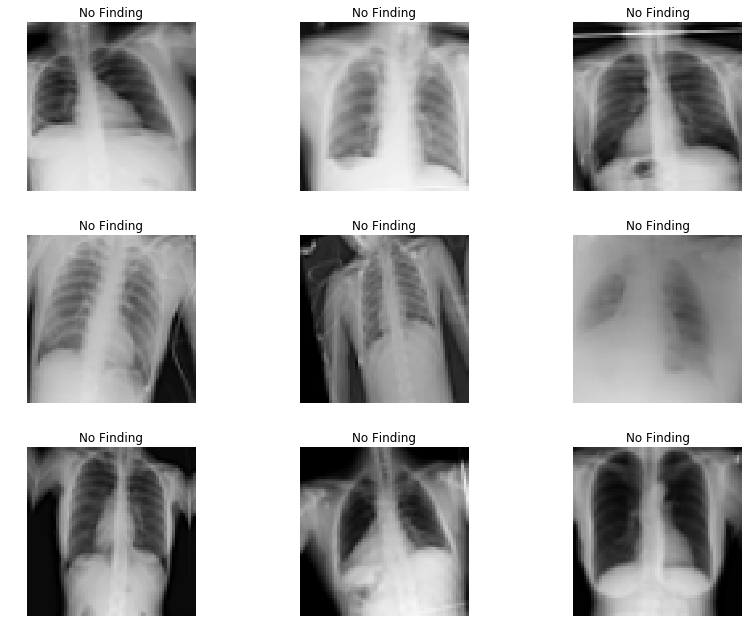

In [40]:
data64.show_batch(rows=3, figsize=(12,9))

In [45]:
learn = create_cnn(data=data64, arch=models.resnet34,  metrics=[accuracy_thresh, fbeta])

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


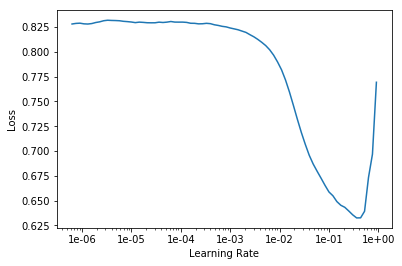

In [47]:
learn.recorder.plot()

In [48]:
lr = 1e-1
learn.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.209742,0.224836,0.933228,0.600168
2,0.184399,0.184239,0.935855,0.625422


In [49]:
learn.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.207108,0.215180,0.929495,0.578434
2,0.187407,0.184414,0.935717,0.623894


In [51]:
tmfs64_noflip = get_transforms(do_flip=False)
data64_noflip = (src64.transform(tmfs64_noflip)
        .databunch(bs=128).normalize(imagenet_stats))

In [52]:
learn.data = data64_noflip

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


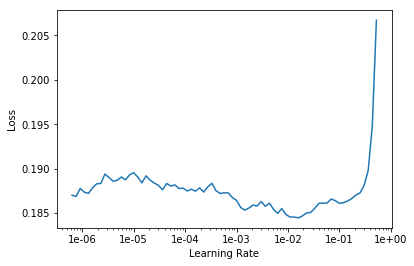

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(2, slice(lr/100, lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.206010,0.191923,0.934950,0.618930
2,0.180767,0.183625,0.935871,0.622380


In [56]:
learn.save('stage1-frozen_s64_rn34_6epochs')

In [57]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


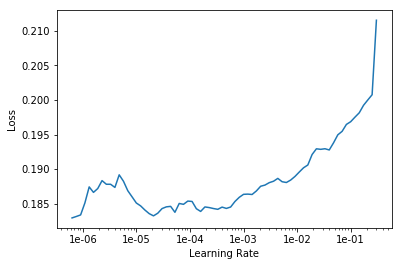

In [58]:
learn.lr_find()
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(4, slice(1e-5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.181673,0.183478,0.935940,0.622427
2,0.182517,0.182909,0.936065,0.624704
3,0.179815,0.182819,0.936093,0.623586
4,0.181923,0.190416,0.936061,0.623919


In [60]:
src128  = source_train_data(p/'large_files'/'img128')
data128 = src128.databunch().normalize(imagenet_stats)
learn.data = data128
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


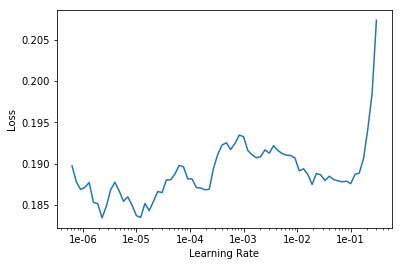

In [61]:
learn.lr_find()
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(4, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.179828,0.226086,0.936412,0.627355
2,0.175933,0.180638,0.936594,0.628415
3,0.173162,0.177193,0.937415,0.632113
4,0.174245,0.216489,0.937285,0.636800


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


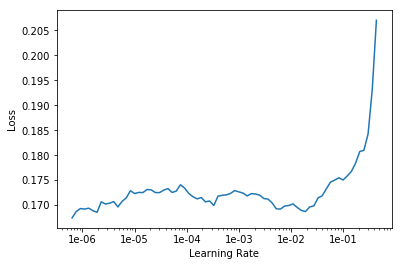

In [63]:
learn.lr_find()
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(4, slice(1e-3/2, 1e-2/2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.176679,0.182517,0.937370,0.635430
2,0.172886,0.178330,0.937281,0.637230
3,0.172879,0.177340,0.937661,0.639908
4,0.171337,0.176466,0.937573,0.639965


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


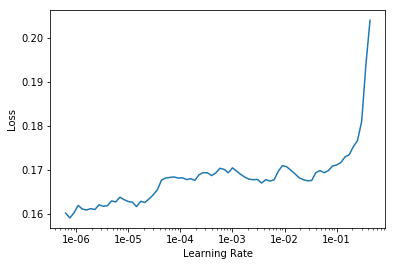

In [65]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(4, slice(1e-6, 1e-4/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.173980,0.179574,0.937451,0.639287
2,0.172033,0.176136,0.937592,0.639924
3,0.169659,0.175300,0.937560,0.640072
4,0.168797,0.176998,0.937673,0.640567


In [74]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


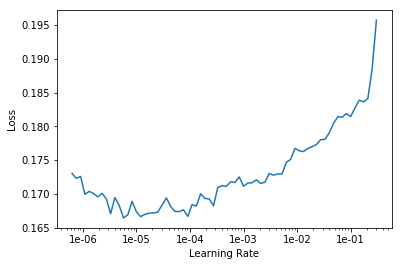

In [75]:
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(4, slice(1e-6, 1e-4/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.168717,0.175739,0.937487,0.640621
2,0.171522,0.198415,0.937649,0.642046
3,0.166931,0.176609,0.937718,0.642888
4,0.168426,0.198199,0.937657,0.643209


In [78]:
learn.save('stage2-BCE-Loss-128')

In [77]:
from torch.nn import MultiMarginLoss, MultiLabelMarginLoss

In [89]:
learn = create_cnn(data=data64, arch=models.resnet34, metrics=[accuracy_thresh, fbeta])

In [145]:
learn.load('stage2-BCE-Loss-128')

Learner(data=ImageDataBunch;

Train: LabelList
y: MultiCategoryList (65994 items)
[MultiCategory No Finding, MultiCategory No Finding, MultiCategory No Finding, MultiCategory Infiltration, MultiCategory No Finding]...
Path: large_files/img256
x: ImageItemList (65994 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: large_files/img256;

Valid: LabelList
y: MultiCategoryList (16498 items)
[MultiCategory Consolidation;Infiltration;Nodule, MultiCategory Atelectasis;Effusion, MultiCategory Consolidation;Pneumonia, MultiCategory No Finding, MultiCategory No Finding]...
Path: large_files/img256
x: ImageItemList (16498 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: large_files/img256;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e

In [146]:
learn.data = data128

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


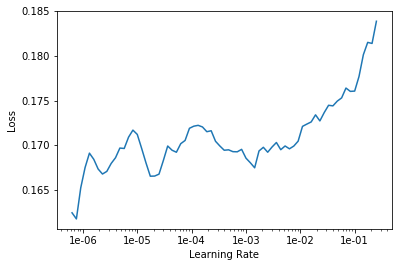

In [147]:
learn.lr_find()
learn.recorder.plot()

In [150]:
learn.freeze()

In [151]:
src256  = source_train_data(p/'large_files'/'img256')
data256 = src256.databunch().normalize(imagenet_stats)

In [152]:
learn.data = data256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


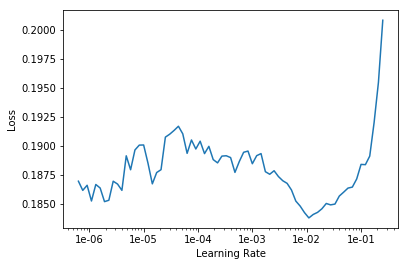

In [153]:
learn.lr_find()
learn.recorder.plot()

In [154]:
learn.fit_one_cycle(4, slice(1e-3, 1e-2/2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.175841,0.181061,0.936287,0.634461
2,0.174014,0.178269,0.937233,0.639832
3,0.172342,0.175789,0.937855,0.640967
4,0.170184,0.173852,0.937879,0.641662


In [155]:
# learn.save('stage3-256-frozen')

In [171]:
from sklearn.metrics import roc_auc_score

learn.load('stage3-256-frozen')

preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

for c in range(interp.data.c):
    auc_score = roc_auc_score(y[:, c], preds[:, c])
    print(f'{interp.data.classes[c]} : ', auc_score)

Atelectasis :  0.7733893145513328
Cardiomegaly :  0.8293595634022903
Consolidation :  0.7908519674497052
Edema :  0.9031050148275176
Effusion :  0.8673155879884406
Emphysema :  0.8262359311652274
Fibrosis :  0.7594017619534098
Hernia :  0.7443064496538322
Infiltration :  0.6792793807470439
Mass :  0.7437737100100081
No Finding :  0.744167732070202
Nodule :  0.6543591516288493
Pleural_Thickening :  0.757938136103931
Pneumonia :  0.7491629438087888
Pneumothorax :  0.7804127697255193


In [172]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


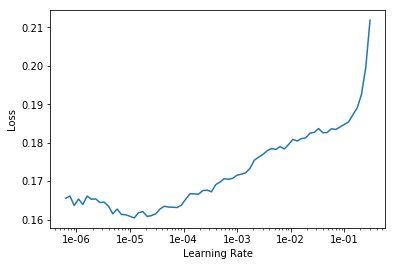

In [173]:
learn.lr_find()
learn.recorder.plot()

In [175]:
learn.fit_one_cycle(3, slice(1e-6))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.166101,0.175583,0.937710,0.641355
2,0.169051,0.173735,0.937762,0.640720
3,0.168997,0.175001,0.937823,0.642043


In [176]:
# learn.save('stage3-256-unfrozen')

In [188]:
learn.load('stage3-256-unfrozen')

preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

for c in range(interp.data.c):
    auc_score = roc_auc_score(y[:, c], preds[:, c])
    print(f'{interp.data.classes[c]} : ', auc_score)

Atelectasis :  0.7729507391817257
Cardiomegaly :  0.8312370268442288
Consolidation :  0.7905757159499922
Edema :  0.9032215505888372
Effusion :  0.8674758680684598
Emphysema :  0.8278440532538563
Fibrosis :  0.7593117671665384
Hernia :  0.7482217144418802
Infiltration :  0.6793273882037398
Mass :  0.74332376423647
No Finding :  0.7441322650746596
Nodule :  0.6548785662117064
Pleural_Thickening :  0.7579496149342383
Pneumonia :  0.749248198662588
Pneumothorax :  0.7799562128459945


# Evaluation on Test Set

In [181]:
def source_test_data(path):
    s = (ImageItemList.from_df(test_df, path=path, cols='Image Index')
        .no_split()
        .label_from_df(cols="Finding Labels", label_delim='|'))
    return s

learn.load('stage3-256-frozen')

test_src = source_test_data(p/'large_files'/'img256')

test_data = test_src.databunch().normalize(imagenet_stats)



![](illustrations/illustration.PNG)

In [182]:
learn.load('stage3-256-frozen')
learn.data = test_data

preds,y,losses = learn.get_preds(ds_type=DatasetType.Train, with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

for c in range(interp.data.c):
    auc_score = roc_auc_score(y[:, c], preds[:, c])
    print(f'{interp.data.classes[c]} : ', auc_score)

Atelectasis :  0.724872443858543
Cardiomegaly :  0.829108725052327
Consolidation :  0.7072843509406677
Edema :  0.8177565135444944
Effusion :  0.7943263269691069
Emphysema :  0.7873147485989671
Fibrosis :  0.7357801998211304
Hernia :  0.795987021906998
Infiltration :  0.6819628726307164
Mass :  0.6757537614481706
No Finding :  0.7095702102999294
Nodule :  0.6343682927003187
Pleural_Thickening :  0.7070114510207761
Pneumonia :  0.6714397588240553
Pneumothorax :  0.7987023966426194


In [189]:
learn.load('stage3-256-unfrozen')
learn.data = test_data

preds,y,losses = learn.get_preds(ds_type=DatasetType.Train, with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

for c in range(interp.data.c):
    auc_score = roc_auc_score(y[:, c], preds[:, c])
    print(f'{interp.data.classes[c]} : ', auc_score)

Atelectasis :  0.7250386482578579
Cardiomegaly :  0.8308501332936148
Consolidation :  0.7068664299451245
Edema :  0.8188008229390709
Effusion :  0.7945036053552443
Emphysema :  0.7868330019648507
Fibrosis :  0.7373646411294833
Hernia :  0.7920083711277704
Infiltration :  0.681086164855223
Mass :  0.6772229950731823
No Finding :  0.7103167492437966
Nodule :  0.6358340294125057
Pleural_Thickening :  0.7075726640625986
Pneumonia :  0.6721373961227453
Pneumothorax :  0.7992232685540738
